In [1]:
#!/usr/bin/python2.7
import argparse
import math
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


"""
Start causality score vs. Feature analysis #1: TSS
IN: Master table (or CAVIAR output) + bed file with feature coordinates
OUT: Causality score at genomic features
NOTE: The start coordinate of [+] strand and the end coordinate of [-] strand represent the TSS 
      FEAURES= table files with at least these columns ['chrom','gene','start','end']
"""


def PROGRESS(msg, printit=True):
    if printit: # false for some messages when not in debug mode
        sys.stderr.write("%s\n"%msg.strip())


In [2]:
CAUSALSCORES = "/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/WholeBlood/Master.table"
ANNOTATION = "~/projects/GTEX_eSTRs/data/Lin_Reg/Gene_Exp_Annotation.txt"
FEATURE=None
STRs = "/storage/szfeupe/data/Regions_HipSTR_reference.hg19.bed"
chrom=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,'X', 'Y']
chrom=['chr'+str(o) for o in chrom]
NAME='TSS'


In [3]:
# Load causality scores file
CAUSE = pd.read_csv(CAUSALSCORES, sep='\t')

# Load Annotation file
ANNOT = pd.read_csv(ANNOTATION)

# Load feature file
if FEATURE != None :
    FEAT = pd.read_csv(FEATURES)
    print('Features other than TSS')

# Load STR coordinates
STR = pd.read_csv(STRs, sep='\t', header=None)

# Load STR genotypes
#strgt = pd.read_csv(STRGTFILE, sep="\t")
#CAUSE = CAUSE_Sc[['gene','chrom','best.str.start','best.str.score','top.variant','top.variant.score','causality.score']]

# Open output
OUT = open(NAME+'.tsv', 'w')
OUT = []

for ch in chrom:
    scores = CAUSE.loc[CAUSE['chrom']==ch]
    annot = ANNOT.loc[ANNOT['gene.chr']==ch]
    strs = STR.loc[STR[0]==ch]
#   strs = strs.loc[strs[1].isin(L+[x-1 for x in list(scores['best.str.start'])])]
    if FEATURE != None :
        Feats = FEAT.loc[FEAT['chrom']==ch]
    GENES = list(scores['gene'])
    print(ch, len(OUT))
    for gene in GENES :
        #print(gene,len(OUT))
        genestart = annot.loc[annot['gene.id']==gene]['gene.start'].tolist()[0]
        geneend= annot.loc[annot['gene.id']==gene]['gene.stop'].tolist()[0]
        strand = annot.loc[annot['gene.id']==gene]['gene.strand'].tolist()[0]
        str_start = scores.loc[scores['gene']==gene]['best.str.start'].tolist()[0]

        str_end = strs.loc[strs[1].isin([i for i in range(str_start, str_start+5,1)])][2].tolist()[0] #+5 just in case

        if FEATURE is None:
            if strand == '+':
                featstart = genestart
                featend = genestart
            elif strand == '-':
                featend = geneend-10000        #  I want to account for 99
                featstart = geneend-10000      #  bp after transcription start
        else:
            featstart = Feat.loc[Feat['gene']==gene].at['start'].tolist()[0]
            featend = Feat.loc[Feat['gene']==gene].at['end'].tolist()[0]

#Within 10kbp of TSS in the transcription        
        if (str_start in range(featstart,featend+10000,1)) or (str_end in range(featstart,featend+10000,1)):
            OUT.append(scores.loc[scores['gene']==gene])
            
            
TSS_STRs = pd.concat(OUT)
TSS_STRs

chr1 0
chr2 21
chr3 65
chr4 100
chr5 109
chr6 135
chr7 178
chr8 189
chr9 213
chr10 238
chr11 240
chr12 287
chr13 316
chr14 329
chr15 343
chr16 359
chr17 372
chr18 380
chr19 389
chr20 413
chr21 428
chr22 434
chrX 437
chrY 437


,chrom_x,gene,best.str.start,best.str.score,top.variant,top.variant.score,num_snps,cis_snp_h2,cis_snp_h2_se,cis_str_h2,...,chrom,str.id,NTEST,p.wald,AD.pval,qvalue,significant,beta,beta.se,causality.score
3,chr1,ENSG00000187608.5,954850,0.009213,SNP_951295,0.021633,551,0.000001,0.074650,0.025587,...,chr1,STR_954850,12,6.496027e-02,7.795232e-01,1.000000,0,-0.161114,0.086560,9.212210e-03
9,chr1,ENSG00000160087.16,1200945,0.003895,SNP_1181372,0.016605,604,0.010530,0.029463,0.006836,...,chr1,STR_1200945,1,3.045579e-01,3.045579e-01,0.905451,0,-0.090386,0.087685,1.533125e-03
26,chr1,ENSG00000197785.9,1454045,0.011664,STR_1454045,0.011664,432,0.000001,0.060508,0.031893,...,chr1,STR_1454045,7,6.092143e-02,4.264500e-01,1.000000,0,-0.180946,0.095525,1.166363e-02
32,chr1,ENSG00000189409.8,1577059,0.006191,SNP_1567206,0.013302,296,0.000001,0.024354,0.011899,...,chr1,STR_1577059,7,1.964904e-01,1.000000e+00,1.000000,0,-0.109421,0.084310,6.190430e-03
33,chr1,ENSG00000248333.3,1585272,0.004168,SNP_1585642,0.056204,315,0.066654,0.082344,0.002355,...,chr1,STR_1585272,9,6.720490e-02,6.048441e-01,1.000000,0,0.157420,0.085310,1.422258e-04
37,chr1,ENSG00000008130.11,1707901,0.008179,SNP_1675491,0.035161,286,0.000001,0.049279,0.030384,...,chr1,STR_1707901,12,3.565931e-02,4.279118e-01,1.000000,0,0.176468,0.083189,8.179221e-03
43,chr1,ENSG00000162585.12,2139349,0.059362,STR_2139349,0.059362,506,0.000001,0.072486,0.065165,...,chr1,STR_2139349,9,4.094003e-03,3.684603e-02,0.361434,0,0.248309,0.084959,5.936079e-02
78,chr1,ENSG00000173662.15,6618096,0.024020,STR_6618096,0.024020,444,0.000001,0.060238,0.054684,...,chr1,STR_6618096,7,1.826078e-02,1.278255e-01,0.641370,0,-0.234492,0.097702,2.401936e-02
82,chr1,ENSG00000041988.11,6685806,0.011502,SNP_6686214,0.020224,380,0.016421,0.043683,0.029220,...,chr1,STR_6685806,12,4.244248e-02,5.093097e-01,1.000000,0,0.170541,0.083277,7.363560e-03
103,chr1,ENSG00000171603.12,9880575,0.005137,SNP_9876648,0.017883,396,0.000001,0.039185,0.014620,...,chr1,STR_9880575,13,1.593719e-01,1.000000e+00,1.000000,0,-0.120447,0.085125,5.136589e-03


In [ ]:
#A=STR.loc[STR[0]==ch]
#L=list(scores['best.str.start'])    #50481,965008,954850

strs.loc[strs[1]>=965000]      #str_start=965008   but STR[1]=965010 (+2)

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


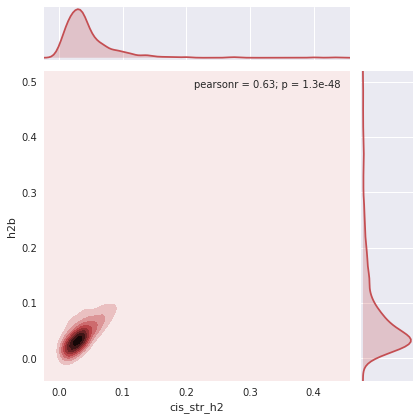

(437, 26)  After restricting to h2b<=.5  (432, 26)


(47, 26)

In [6]:
Master = TSS_STRs
#Plot h2 vs causality.score
Master['h2b']= Master["cis_snp_h2"] + Master["cis_str_h2"]
MM1 = Master.loc[Master['h2b']<=0.5]
ESTR = Master.loc[Master['qvalue']<0.1]
#plt.scatter(ESTR['cis_str_h2'],ESTR['h2b'])
sns.jointplot(x="cis_str_h2", y="h2b", data=MM1, kind="kde", color="r")
plt.show()
print (Master.shape, ' After restricting to h2b<=.5 ',MM1.shape)
#Plot cis_str_h2 vs causality.score

ESTR.shape

In [ ]:
#PLOT causality.score vs STR genotypes 
